# Optimize models by using gradient descent

### The optimizer's role is to alter the model in a way that improves its performance. It does this alteration by inspecting the model optputs and cost and suggesting new parameters for the model.

# Gradient descent

### The most common optimization model today is gradient descent. Several variants of the algorithm exists, but they all use the same core concept.

### Gradient descent uses calculus to estimate how changing each parameter changes the cost. Gradient descent calculates the gradient/slope of the relationship between each model parameter and the cost. The parameters are then altered to move down this slope.

### The two main sources of error are local minima and instability. 

# Local minima

### A local minima is a point in a model's loss landscape where the error is lower than all its immediately surrounding points, but not necessarily lowest possible error overall. 

## The problem with local minima

### Suboptimal performance: If an optimization algorithm gets trapped in a shallow local minimum, the resulting model will not be accurate as it could be, because better solution exists somewhere else.

### Learning Paralysis: The gradient descent algorithm works by following the steepest downhill direction. Once it reaches a local minimum, the slope becomes zero. At this point, the algorithm has no direction to move and stops making progress, causing training to stall. 

/var/folders/lz/9ztyyq913n1_6xkj9g8_jlg40000gn/T/ipykernel_2189/3588487214.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


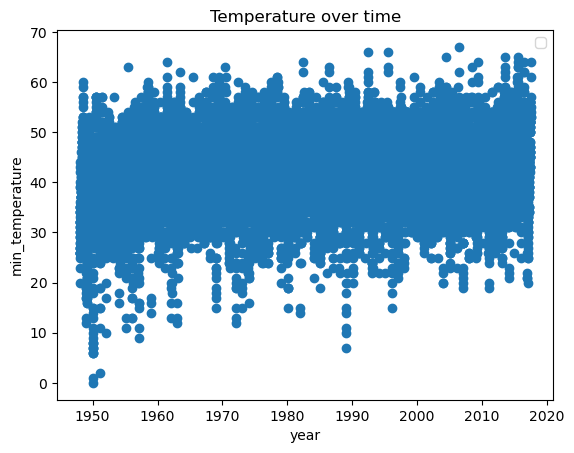

In [7]:
from datetime import datetime
import pandas as pd

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

data = pd.read_csv('seattleWeather_1948-2017.csv', parse_dates=['date'])

data = data[[d.month < 7 for d in data.date]].copy()

data['year'] = [(d.year + d.timetuple().tm_yday / 365.25) for d in data.date]

plt.scatter(data['year'], data['min_temperature'])

plt.xlabel('year')
plt.ylabel('min_temperature')
plt.title('Temperature over time')
plt.legend()

In [8]:
import statsmodels.formula.api as smf

model = smf.ols(formula='min_temperature ~ year', data= data).fit()

intercept = model.params[0]
slope = model.params[1]



/var/folders/lz/9ztyyq913n1_6xkj9g8_jlg40000gn/T/ipykernel_2189/1343672947.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
/var/folders/lz/9ztyyq913n1_6xkj9g8_jlg40000gn/T/ipykernel_2189/1343672947.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]


In [9]:
# Model selection

class MyModel:
    def __init__(self):
        self.intercept = 0
        self.slope = 0

    def predict(self, date):
        return date * self.slope + self.intercept
    
    def get_summary(self):
        return f"y = {self.slope } * x + {self.intercept}"
    

In [ ]:
# Implementing gradient descent

import numpy as np

x = data.year

temperature_true = data.min_temperature

intercepts = np.linspace(-100, -70, 10)
slopes = np.linspace(1.060, 0.07, 10)

def cost_function(temperature_estimates):
    return np.mean((temperature_true - temperature_estimates) **2 )

def predict_and_calculate_cost(intecept, slope):
    temperature_estimate = x * slope + intercept

    return cost_function(temperature_estimate)

def calculate_gradient(temperature_estimate):
    error = temperature_estimate - temperature_true
    grad_intercept = np.mean(error) * 2
    grad_slope = (x * error).mean() * 2

    return grad_intercept, grad_slope


def gradient_descent(learning_rate, number_of_iterations):
    model = MyModel()
    model.intercept = -83
    model.slope = 0

    for i in range(number_of_iterations):
        predicted_temperature = model.predict(x)
        _, grad_slope = calculate_gradient(predicted_temperature)

        model.slope -= learning_rate * grad_slope

        if(i % 100 == 0):
            estimate = model.predict(x)
            cost = cost_function(estimate)
            print("Next estimate: ", model.get_summary(), f"cost: {cost}")

        print("Final estimate: ", model.get_summary())


gradient_descent(learning_rate=1E-9, number_of_iterations=1000)


Next estimate:  y = 0.0004946403321335816 * x + -83 cost: 15374.064817888928
Final estimate:  y = 0.0004946403321335816 * x + -83
Final estimate:  y = 0.0009853911084300446 * x + -83
Final estimate:  y = 0.0014722829140310107 * x + -83
Final estimate:  y = 0.0019553460935748342 * x + -83
Final estimate:  y = 0.002434610753087775 * x + -83
Final estimate:  y = 0.002910106761860303 * x + -83
Final estimate:  y = 0.0033818637543086465 * x + -83
Final estimate:  y = 0.003849911131821701 * x + -83
Final estimate:  y = 0.004314278064593419 * x + -83
Final estimate:  y = 0.004774993493440788 * x + -83
Final estimate:  y = 0.005232086131607514 * x + -83
Final estimate:  y = 0.005685584466553521 * x + -83
Final estimate:  y = 0.00613551676173038 * x + -83
Final estimate:  y = 0.006581911058342778 * x + -83
Final estimate:  y = 0.007024795177096132 * x + -83
Final estimate:  y = 0.007464196719930467 * x + -83
Final estimate:  y = 0.007900143071740652 * x + -83
Final estimate:  y = 0.008332661402

In [11]:

gradient_descent(learning_rate=1E-8, number_of_iterations=200)

Next estimate:  y = 0.004946403321335816 * x + -83 cost: 13267.277888290606
Final estimate:  y = 0.004946403321335816 * x + -83
Final estimate:  y = 0.009503851058959779 * x + -83
Final estimate:  y = 0.013702928354493493 * x + -83
Final estimate:  y = 0.0175718153168834 * x + -83
Final estimate:  y = 0.02113647613979118 * x + -83
Final estimate:  y = 0.02442083334792328 * x + -83
Final estimate:  y = 0.027446928341670836 * x + -83
Final estimate:  y = 0.030235069317479005 * x + -83
Final estimate:  y = 0.03280396755664281 * x + -83
Final estimate:  y = 0.035170862997166964 * x + -83
Final estimate:  y = 0.03735163993140535 * x + -83
Final estimate:  y = 0.03936093360592989 * x + -83
Final estimate:  y = 0.041212228439023085 * x + -83
Final estimate:  y = 0.04291794851493412 * x + -83
Final estimate:  y = 0.04448954096220774 * x + -83
Final estimate:  y = 0.045937552775639844 * x + -83
Final estimate:  y = 0.04727170159741379 * x + -83
Final estimate:  y = 0.048500940932431326 * x + -8

In [12]:
gradient_descent(learning_rate=5E-9, number_of_iterations=500)

Next estimate:  y = 0.002473201660667908 * x + -83 cost: 14418.47575948954
Final estimate:  y = 0.002473201660667908 * x + -83
Final estimate:  y = 0.004849164425407853 * x + -83
Final estimate:  y = 0.007131711436922534 * x + -83
Final estimate:  y = 0.009324515523372457 * x + -83
Final estimate:  y = 0.011431105108294374 * x + -83
Final estimate:  y = 0.013454869888159419 * x + -83
Final estimate:  y = 0.01539906628670661 * x + -83
Final estimate:  y = 0.017266822694828272 * x + -83
Final estimate:  y = 0.019061144504438837 * x + -83
Final estimate:  y = 0.020784918944426953 * x + -83
Final estimate:  y = 0.022440919726472424 * x + -83
Final estimate:  y = 0.024031811508203518 * x + -83
Final estimate:  y = 0.025560154180876263 * x + -83
Final estimate:  y = 0.027028406988475025 * x + -83
Final estimate:  y = 0.02843893248486234 * x + -83
Final estimate:  y = 0.02979400033534548 * x + -83
Final estimate:  y = 0.031095790968776748 * x + -83
Final estimate:  y = 0.032346399086064126 * 